## school / category
#### 依學校or 類別分類 (分類方式參見word檔)

In [4]:
import pandas as pd

department_ds = pd.read_csv('108cat1.csv', encoding="utf-8", dtype=str) 

depname_abbr = department_ds['depname_abbr'] 
des_rank1 = department_ds['des_class_rank'] 
basic_rank = department_ds['basic_class_rank'] 
dep_color = department_ds['school_group_my']    #school:學校, category:系所類別

ndep = department_ds.shape[0] 

department_ds.head(10)

,school_id,dep_id,school_name,department_name,depname_abbr,school_group_my,category_id,category_name,basic_class_rank,basic_preference_score,des_class_rank,new_des_score
0,13,13252,國立交通大學,人文社會學系,交大人文社會,1,2,藝術及人文,104,0.734816,110,464.4430493
1,40,40092,元智大學,人文社會學院英語學士班,NaN,4,3,社會科學、新聞學及圖書資訊,315,-0.126363,466,368.367222
2,11,11042,國立清華大學,人文社會學院學士班,清大人社學院,1,2,藝術及人文,39,1.421639,96,467.8470331
3,108,108122,慈濟大學,人類發展與心理學系,慈濟人類心理,6,3,社會科學、新聞學及圖書資訊,538,-0.603708,649,313.9851187
4,1,1052,國立臺灣大學,人類學系,臺大人類學系,1,2,藝術及人文,27,1.68387,17,499.1876177
5,47,47072,世新大學,口語傳播學系,世新口語傳播,5,3,社會科學、新聞學及圖書資訊,358,-0.23751,448,371.9448088
6,51,51122,長榮大學,土地管理與開發學系,長榮土地管理,6,7,工程、製造及營建,609,-0.755882,715,285.2735443
7,15,15332,逢甲大學,土地管理學系,逢甲土地管理,4,4,商業、管理及法律,438,-0.404569,443,372.9626049
8,6,6332,國立政治大學,土耳其語文學系,政大土耳其語,1,2,藝術及人文,86,0.900156,77,474.0659491
9,14,14042,淡江大學,大眾傳播學系,淡江大傳,4,3,社會科學、新聞學及圖書資訊,472,-0.475377,380,387.2106145


In [5]:
from matplotlib.font_manager import FontProperties
from matplotlib import pyplot as plt
import numpy as np
ChineseFont2 = FontProperties(fname='C:\\Windows\\Fonts\\msjh.ttc')

category_df = dep_color.drop_duplicates().sort_values()
ncategory = category_df.shape[0]
colors = plt.cm.rainbow(np.linspace(0, 1, ncategory))

for i in range(ndep):
    dep_color[i] = int(dep_color[i])
    dep_color[i] = colors[ dep_color[i]-1 ]

[[0.66840841]]
[133.79720728]
15 東海工工經營資訊
20 大葉工業設計
26 屏東不動產
47 佛光中文應用
110 嘉義外語應用
136 銘傳企管企管
138 銘傳企管數位經營
158 屏東企管
162 大葉企管(經營管理)
170 屏東休閒經營
186 大葉多媒體
198 屏東行銷流通管理
233 東華法律
237 中正法律法制
291 文化俄文
335 中教英語
406 屏東財金
424 亞洲財經法律(科技)
430 中教區域發展
432 屏東商業自動化管理
441 義守國企經營
456 屏東國貿
464 義守國際觀光餐旅
498 亞洲創意商品設計
520 玄奘視覺傳達數媒
525 慈濟傳播學
557 屏東會計
593 南華資工社會
594 南華資工樂齡
610 南華資管多媒體
620 屏東資管
641 佛光資訊應用(數位遊戲)
700 靜宜寰管學程
738 屏東應用日語
750 南華應社社會
756 屏東應用英語
772 長榮環境食安檢驗
795 大葉藥用植物保健


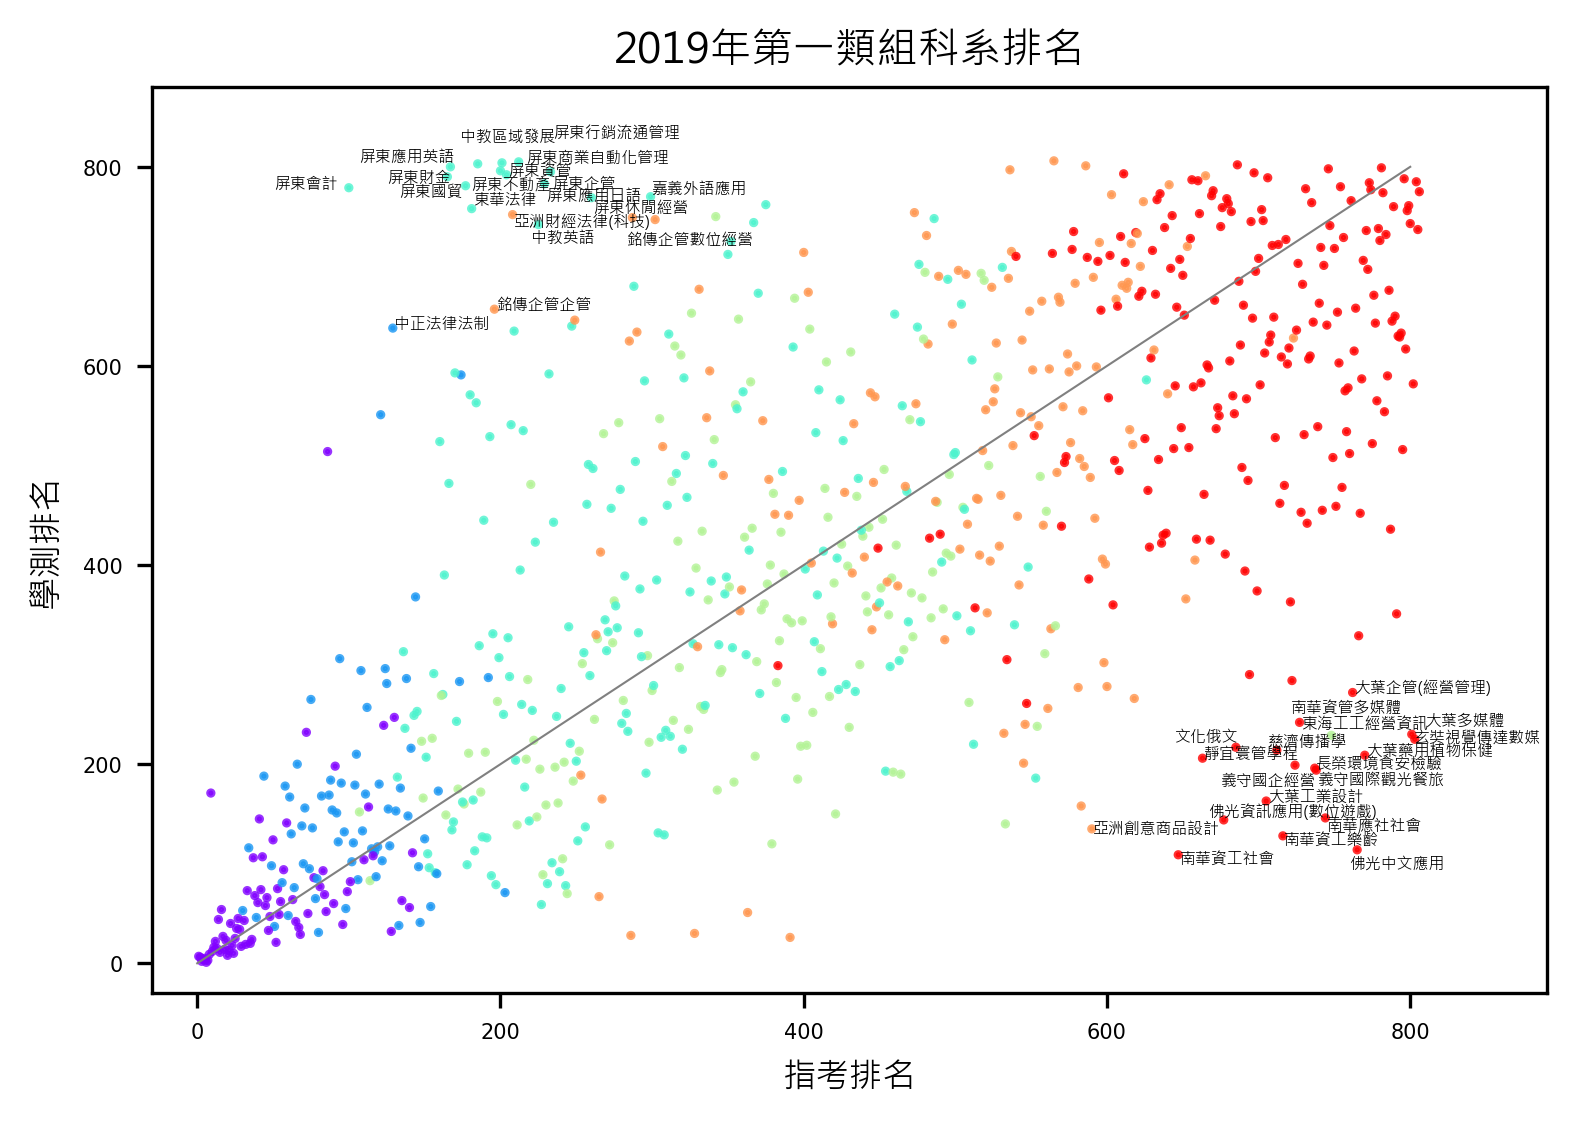

In [18]:
from sklearn.linear_model import LinearRegression

def plot_result(id_, x, y, name, colorid, addname = True, fontsize = 15, markersize = 20,
                dpi = 200, datascale = 1.0, title = None):
    
    for i in range(ndep):
        x[i] = int(x[i]) * datascale
        y[i] = int(y[i]) * datascale
    
    fig, ax = plt.subplots(dpi = dpi)
    if title != None:
        ax.set_title(title, fontproperties=ChineseFont2,fontsize=10)
    ax.scatter(x, y, s = markersize, color = colorid, alpha = 0.8)
    ax.set_xlabel('指考排名', fontproperties=ChineseFont2,fontsize=8)
    ax.set_ylabel('學測排名', fontproperties=ChineseFont2,fontsize=8)
    plt.xticks(fontsize=5)
    plt.yticks(fontsize=5)
    
    #linear regression 
    lm = LinearRegression()
    x_array = np.array(x)
    y_array = np.array(y)
    lm.fit(np.reshape( x_array, (len(x_array), 1)), np.reshape(y_array, (len(y_array), 1)))
    
    print(lm.coef_)
    print(lm.intercept_)
    #to_be_predicted = np.array([ndep])
    #predicted_y = lm.predict(np.reshape(to_be_predicted, (len(to_be_predicted), 1)))
    #plt.plot(x_array, lm.predict(np.reshape(x_array, (len(x_array), 1))), color='gray', linewidth=0.5)
    ax.set_xlim([-30, 890])
    ax.set_ylim([-30, 880])
    xaxis= np.linspace(0,800)
    plt.plot(xaxis, xaxis, color='gray', linewidth=0.5)
    
   #text
    nameshift = 1
    if addname == True:
        for i, txt in enumerate(name):
            b = y[i] - x[i]         #y = ax + b  b = y - ax   #y = 0.5x +b
            if( b > 450 or b <-450 ):
                print(i, name[i])
                if int(i) == 15:
                    ax.annotate( name[i], (int(x[i]) -20, int(y[i])+6), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 335:
                    ax.annotate( name[i], (int(x[i]) -5, int(y[i])-18), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 756:
                    ax.annotate( name[i], (int(x[i]) -60, int(y[i])+6), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 557:
                    ax.annotate( name[i], (int(x[i])-50 + nameshift, int(y[i])), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 424:
                    ax.annotate( name[i], (int(x[i]) + nameshift, int(y[i])-12), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 335:
                    ax.annotate( name[i], (int(x[i]) + nameshift, int(y[i])-8), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 233:
                    ax.annotate( name[i], (int(x[i]) + nameshift, int(y[i])+4), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 498:
                    ax.annotate( name[i], (int(x[i]) + nameshift, int(y[i])-4), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 47:
                    ax.annotate( name[i], (int(x[i]) -5, int(y[i])-18), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 593:
                    ax.annotate( name[i], (int(x[i]) + nameshift, int(y[i])-8), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 641:
                    ax.annotate( name[i], (int(x[i])-10, int(y[i])+4), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 464:
                    ax.annotate( name[i], (int(x[i]) + nameshift, int(y[i])-14), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 291:
                    ax.annotate( name[i], (int(x[i]) -40, int(y[i])+6), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 138:
                    ax.annotate( name[i], (int(x[i]) -4, int(y[i])-26), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 170:
                    ax.annotate( name[i], (int(x[i]) + nameshift, int(y[i])-14), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 456:
                    ax.annotate( name[i], (int(x[i]) -44, int(y[i])-10), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 432:  #屏東商業自動化管理
                    ax.annotate( name[i], (int(x[i])+4 + nameshift, int(y[i])), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 594:
                    ax.annotate( name[i], (int(x[i]) + nameshift, int(y[i])-8), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 750:
                    ax.annotate( name[i], (int(x[i]) + nameshift, int(y[i])-12), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 110:
                    ax.annotate( name[i], (int(x[i]) + nameshift, int(y[i])+4), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 233:
                    ax.annotate( name[i], (int(x[i])-40, int(y[i])-20), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 198:  #屏東行銷流通管理
                    ax.annotate( name[i], (int(x[i])+50, int(y[i])+26), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 610:
                    ax.annotate( name[i], (int(x[i])-6, int(y[i])+10), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 520:
                    ax.annotate( name[i], (int(x[i]) + nameshift, int(y[i])-8), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 525:
                    ax.annotate( name[i], (int(x[i])-6, int(y[i])+4), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 186:
                    ax.annotate( name[i], (int(x[i])+6 + nameshift, int(y[i])+14), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 441:
                    ax.annotate( name[i], (int(x[i])-50 + nameshift, int(y[i])-20), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 738:  #屏東應用日語
                    ax.annotate( name[i], (int(x[i]) + nameshift, int(y[i])-16), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 610:  #屏東資管
                    ax.annotate( name[i], (int(x[i]) + nameshift, int(y[i])-10), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 26:  #屏東不動產
                    ax.annotate( name[i], (int(x[i])-20 + nameshift, int(y[i])-18), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 430:  #中教區域發展
                    ax.annotate( name[i], (int(x[i]) -28, int(y[i])+22), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 158:  #屏東企管
                    ax.annotate( name[i], (int(x[i])+ nameshift , int(y[i])-16), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 557:  #屏東會計
                    ax.annotate( name[i], (int(x[i]) -40, int(y[i])-5), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 756:  #屏東應用英語
                    ax.annotate( name[i], (int(x[i]) + -60, int(y[i])), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 406:  #屏東財金
                    ax.annotate( name[i], (int(x[i]) + -40, int(y[i])-5), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                else:
                    ax.annotate( name[i], (int(x[i]) + nameshift, int(y[i])), size = fontsize, color = 'black', fontproperties=ChineseFont2)      
    plt.savefig('result/group1-'+str(id_)+'.png')
    plt.show()
    
    
plot_result(1, des_rank1, basic_rank, depname_abbr, dep_color, addname = True, fontsize = 3.8, 
        title = '2019年第一類組科系排名', markersize= 1.5, dpi = 300, datascale = 1)

### legend

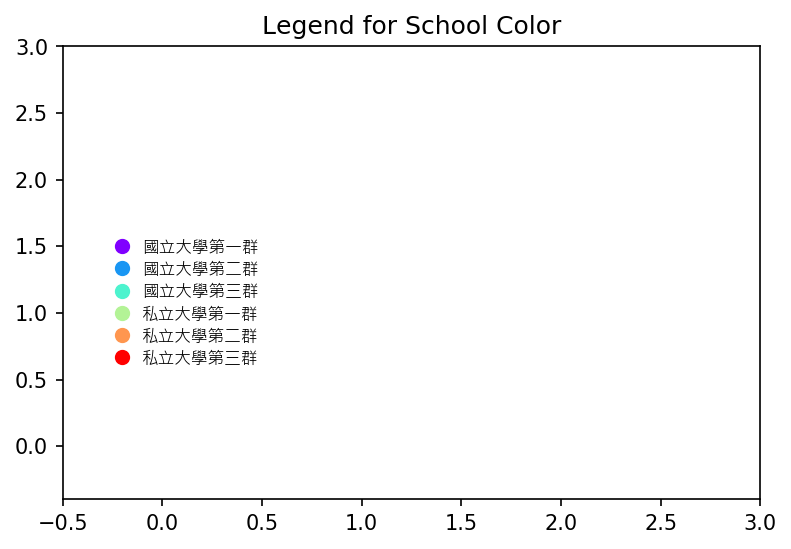

In [28]:
#schoolName = ['台清交成政','國立中','國立後','私立前','私立中','私立後']
schoolName = ['國立大學第一群','國立大學第二群','國立大學第三群','私立大學第一群','私立大學第二群','私立大學第三群']
fig, ax = plt.subplots(dpi = 150)
ax.set_title("Legend for School Color")
ax.set_xlim([-0.5, 3])
ax.set_ylim([-0.4, 3])

for i in range(category_df.shape[0]):
    thecolor = colors[i] 
    x = -0.2
    y = 1.5-i/6  
    ax.scatter(x, y, s = 40, color = thecolor)    
    ax.annotate(schoolName[i], (x+0.1, y-0.05), fontsize=8,  fontproperties=ChineseFont2)
plt.show()


[[0.66840841]]
[133.79720728]
15 東海工工經營資訊
20 大葉工業設計
26 屏東不動產
47 佛光中文應用
110 嘉義外語應用
136 銘傳企管企管
138 銘傳企管數位經營
158 屏東企管
162 大葉企管(經營管理)
170 屏東休閒經營
186 大葉多媒體
198 屏東行銷流通管理
233 東華法律
237 中正法律法制
291 文化俄文
335 中教英語
406 屏東財金
424 亞洲財經法律(科技)
430 中教區域發展
432 屏東商業自動化管理
441 義守國企經營
456 屏東國貿
464 義守國際觀光餐旅
498 亞洲創意商品設計
520 玄奘視覺傳達數媒
525 慈濟傳播學
557 屏東會計
593 南華資工社會
594 南華資工樂齡
610 南華資管多媒體
620 屏東資管
641 佛光資訊應用(數位遊戲)
700 靜宜寰管學程
738 屏東應用日語
750 南華應社社會
756 屏東應用英語
772 長榮環境食安檢驗
795 大葉藥用植物保健


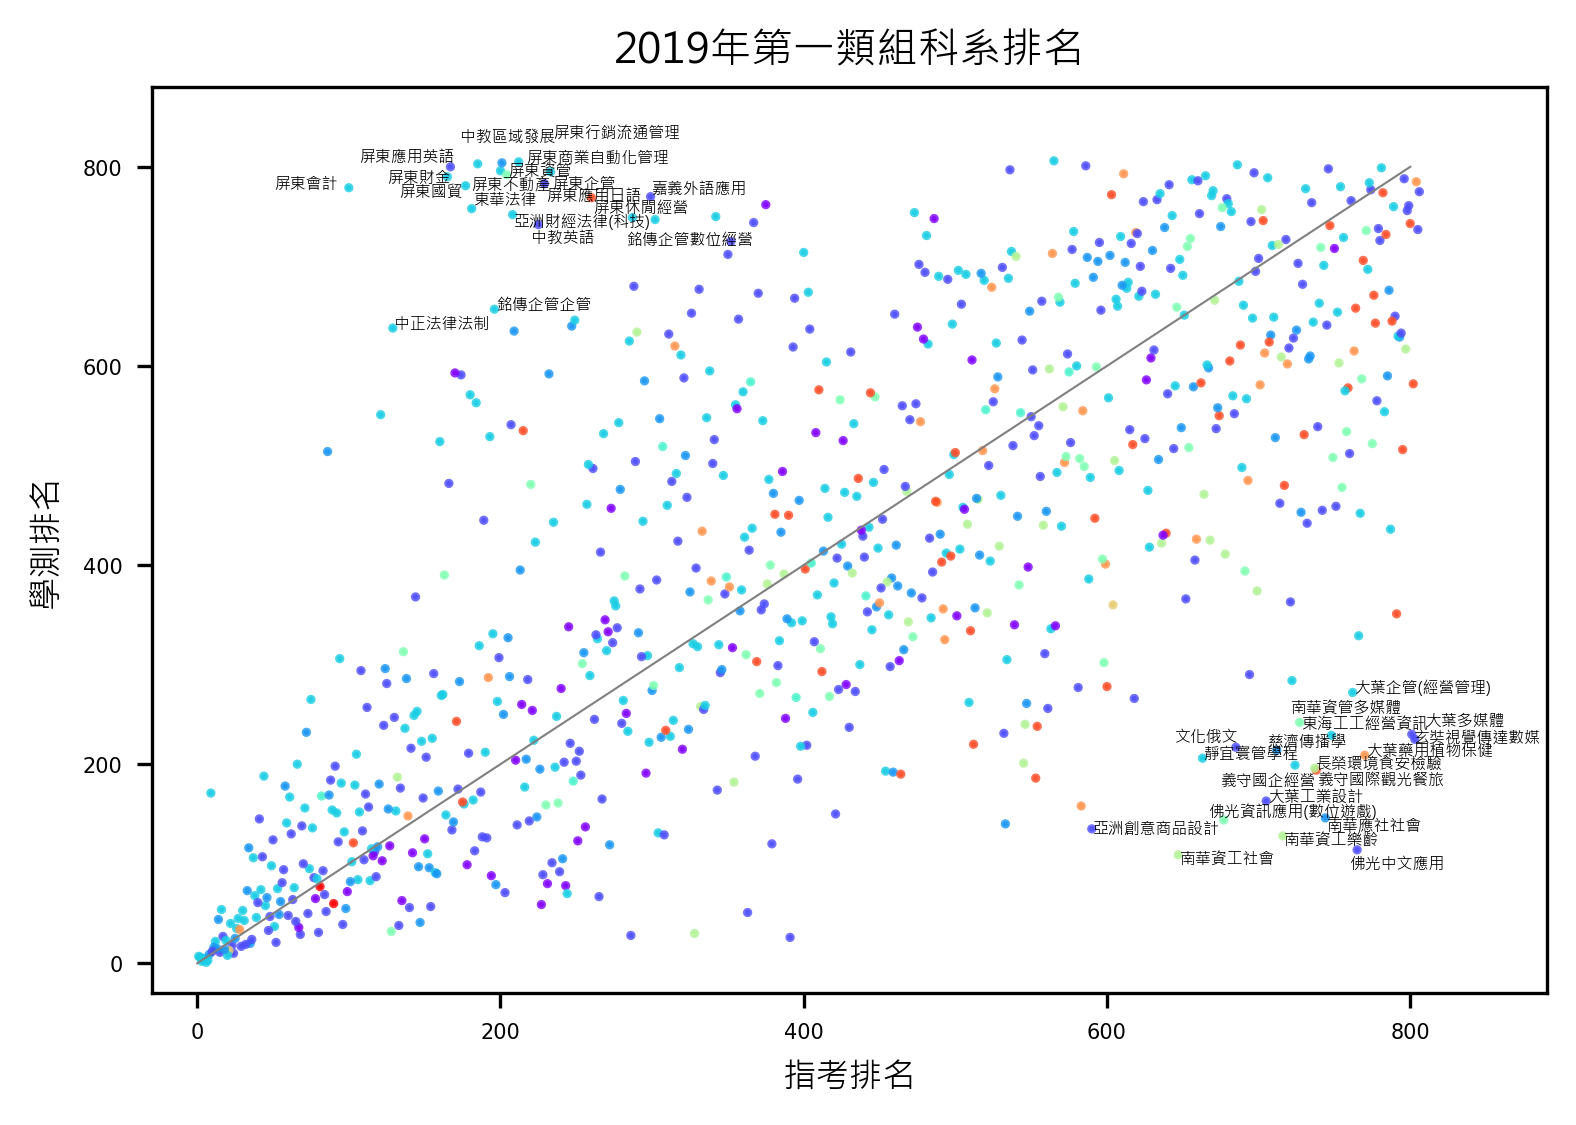

In [21]:
import pandas as pd

department_ds = pd.read_csv('108cat1.csv', encoding="utf-8", dtype=str) 
depname_abbr = department_ds['depname_abbr'] 
des_rank1 = department_ds['des_class_rank'] 
basic_rank = department_ds['basic_class_rank'] 
dep_color = department_ds['category_id']    #school:學校, category:系所類別
ndep = department_ds.shape[0] 


category_df = dep_color.drop_duplicates().sort_values()
ncategory = category_df.shape[0]
colors = plt.cm.rainbow(np.linspace(0, 1, ncategory))

for i in range(ndep):
    if dep_color[i]=='99':
        dep_color[i]=11
    dep_color[i] = colors[ int(dep_color[i])-1 ]

plot_result(2, des_rank1, basic_rank, depname_abbr, dep_color, addname = True, fontsize = 3.8, 
        title = '2019年第一類組科系排名', markersize= 1.5, dpi = 300, datascale = 1)

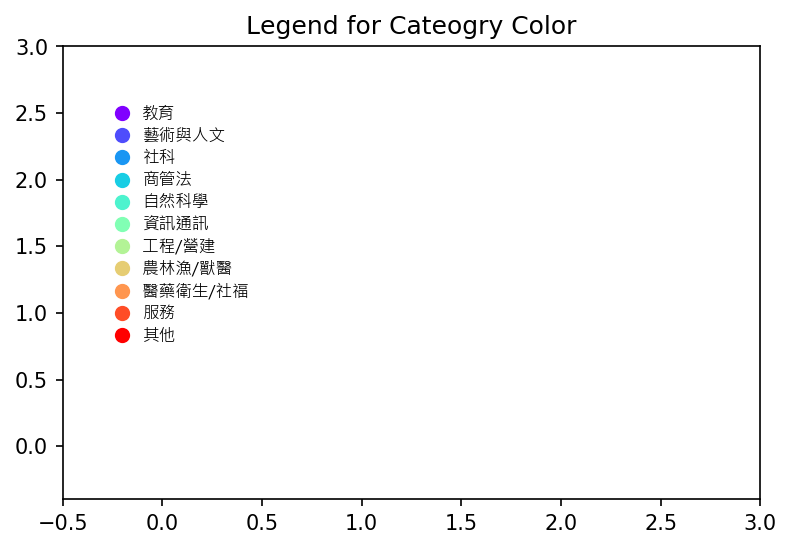

In [22]:
categoryName = ['教育','藝術與人文','社科','商管法','自然科學','資訊通訊','工程/營建 ','農林漁/獸醫 ','醫藥衛生/社福 ','服務','其他']
fig, ax = plt.subplots(dpi = 150)
ax.set_title("Legend for Cateogry Color")
ax.set_xlim([-0.5, 3])
ax.set_ylim([-0.4, 3])
for i in range(category_df.shape[0]):
    thecolor = colors[i] 
    x = -0.2
    y = 2.5-i/6 
    ax.scatter(x, y, s = 40, color = thecolor)    
    ax.annotate(categoryName[i], (x+0.1, y-0.04), fontsize=8,  fontproperties=ChineseFont2)
plt.show()


[[0.66400496]]
[136.07799018]
20 大葉工業設計
26 屏東不動產
47 佛光中文應用
110 嘉義外語應用
136 銘傳企管企管
138 銘傳企管數位經營
148 屏東企管
162 大葉企管(經營管理)
170 屏東休閒經營
186 大葉多媒體
196 屏東行銷流通管理
223 東華法律
230 玄奘法律
235 中正法律法制
290 文化俄文
331 中教英語
336 銘傳風管保險風管
393 屏東財金
422 亞洲財經法律(科技)
428 中教區域發展
430 屏東商業自動化管理
439 義守國企經營
452 屏東國貿
462 義守國際觀光餐旅
498 亞洲創意商品設計
520 玄奘視覺傳達數媒
526 慈濟傳播學
549 屏東會計
593 南華資工社會
594 南華資工樂齡
610 南華資管多媒體
612 屏東資管
642 佛光資訊應用(數位遊戲)
703 靜宜寰管學程
737 屏東應用日語
753 南華應社社會
757 屏東應用英語
775 長榮環境食安檢驗
798 大葉藥用植物保健


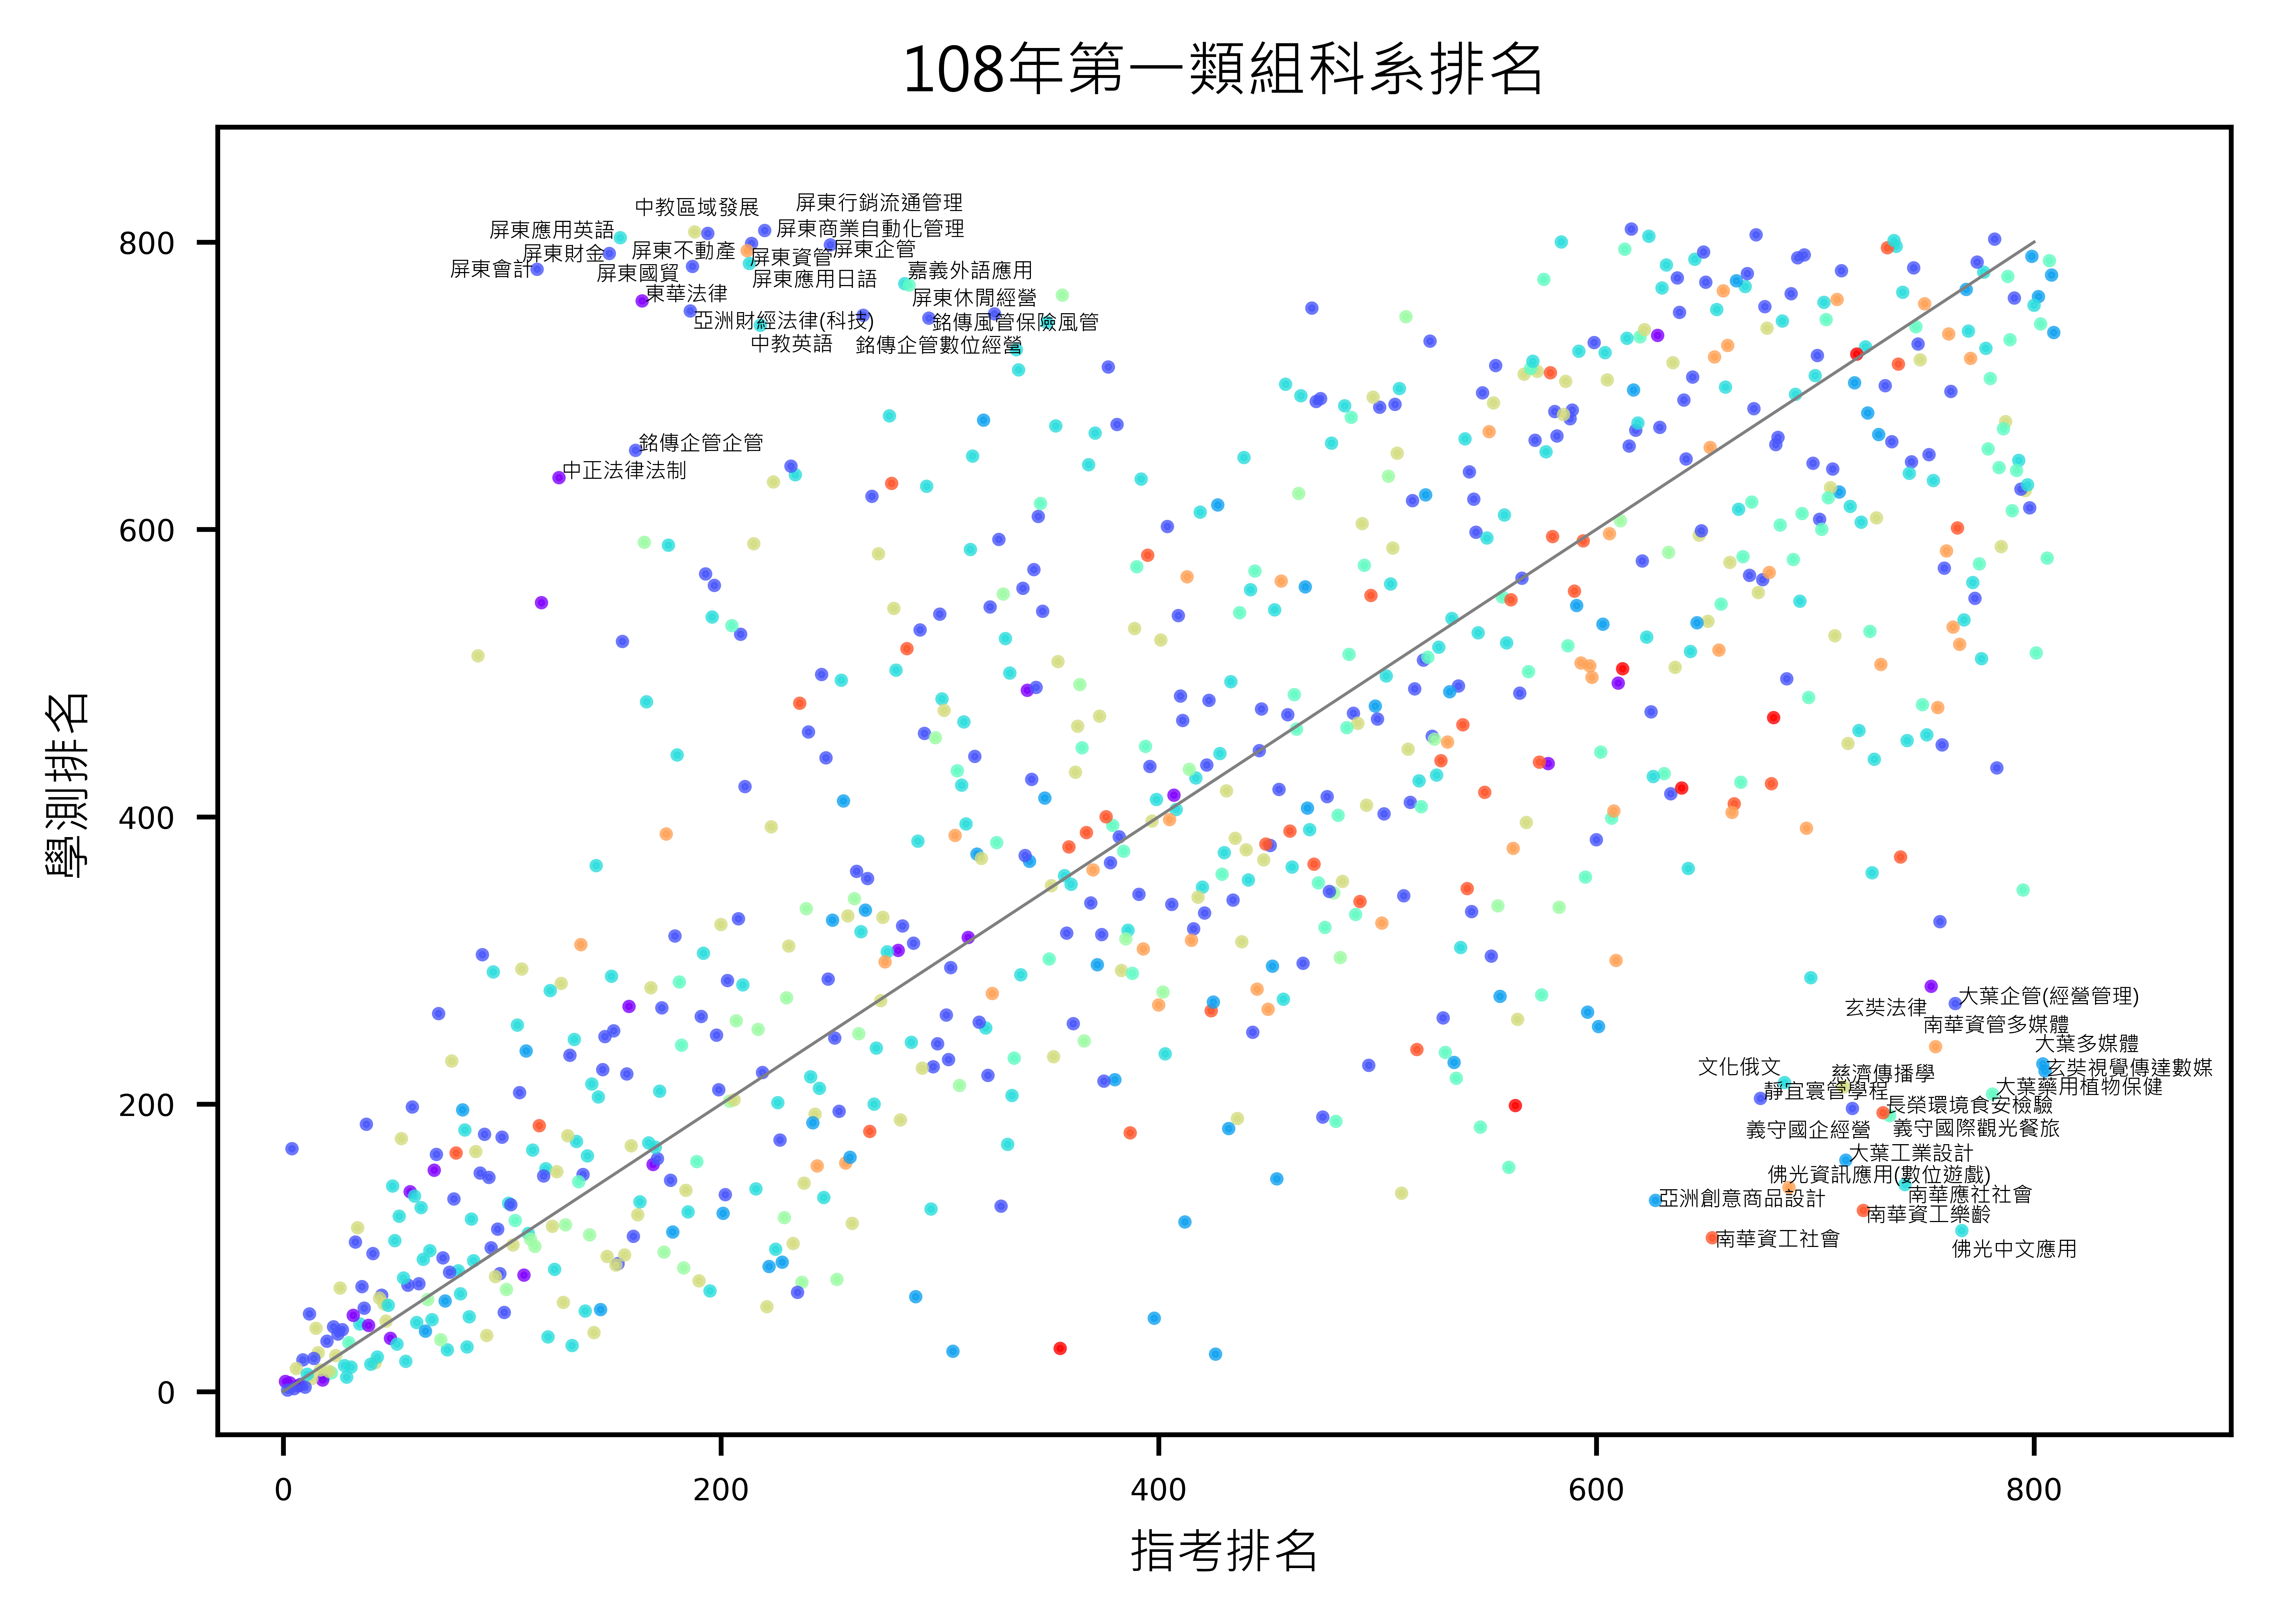

In [7]:
import pandas as pd

department_ds = pd.read_csv('108cat1.csv', encoding="utf-8", dtype=str) 
depname_abbr = department_ds['depname_abbr'] 
des_rank1 = department_ds['des_class_rank1'] 
basic_rank = department_ds['basic_class_rank'] 
dep_color = department_ds['category_my']    #school:學校, category:系所類別
ndep = department_ds.shape[0] 


category_df = dep_color.drop_duplicates().sort_values()
ncategory = category_df.shape[0]
colors = plt.cm.rainbow(np.linspace(0, 1, ncategory))

for i in range(ndep):
    dep_color[i] = colors[ int(dep_color[i])-1 ]

plot_result(3, des_rank1, basic_rank, depname_abbr, dep_color, addname = True, fontsize = 3.5, 
        title = '108年第一類組科系排名', markersize= 1.5, dpi = 1200, datascale = 1)

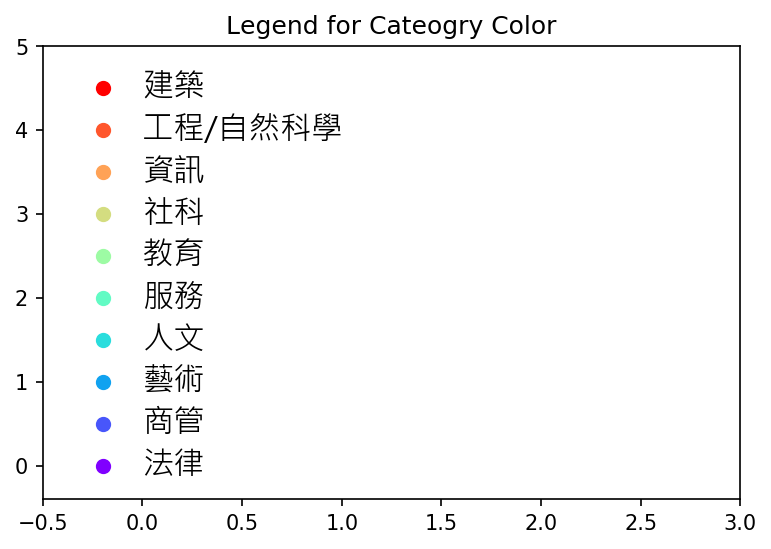

In [8]:
categoryName = ['法律','商管','藝術','人文','服務', '教育','社科','資訊','工程/自然科學 ','建築']
fig, ax = plt.subplots(dpi = 150)
ax.set_title("Legend for Cateogry Color")
ax.set_xlim([-0.5, 3])
ax.set_ylim([-0.4, 5])
for i in range(category_df.shape[0]):
    thecolor = colors[i] 
    x = -0.2
    y = i/2  
    ax.scatter(x, y, s = 40, color = thecolor)    
    ax.annotate(categoryName[i], (x+0.2, y-0.1), fontsize=15,  fontproperties=ChineseFont2)
plt.show()